In [2]:
# Run if working locally
%load_ext autoreload
%autoreload 2

In [3]:
import sqlite3
from sqlite3 import Error
import pickle
import os, sys
import config

config.root_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, config.root_path)

from src.dataset.dataset import RawData
from src.dataset.wikisection_preprocessing import (
    tokenize,
    clean_sentence,
    preprocess_text_segmentation,
    format_data_for_db_insertion,
)
from src.dataset.utils import truncate_by_token
from db.dbv2 import Table, AugmentedTable, TrainTestTable
import pprint

from utils.metrics import windowdiff, pk

from src.bertkeywords.src.similarities import Embedding, Similarities
from src.bertkeywords.src.keywords import Keywords
from src.encoders.coherence_v3 import Coherence
from src.dataset.utils import flatten, dedupe_list, truncate_string
from src.experimentation.coherence_v3 import Experiment, CoherenceExperiment

/Users/mac/miniforge3/envs/phd/lib/python3.8/site-packages/transformers/utils/generic.py:462: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/Users/mac/miniforge3/envs/phd/lib/python3.8/site-packages/transformers/utils/generic.py:319: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


Running experiment set: 1LjAA
Running experiment: CoherenceExperiment(num_samples=100, start=300, dataset_type='city', model_string='sentence-transformers/LaBSE', max_words_per_step=4, coherence_threshold=0.7, experiment_hash='4Cd9B', batch_size=5, max_graph_depth=5, keyword_diversity=0.5, diverse_keywords=False, similar_keywords=True, ablation=False, print_metrics_summary=True, print_predictions_summary=True, show_graphs=True)
Using dataset: wikisection_city
TOTAL BATCHES: 20

..... 1 ..... 2 ..... 3 ..... 4 ..... 5 ..... 6 ..... 7 ..... 8 ..... 9 ..... 10 ..... 11 ..... 12 ..... 13 ..... 14 ..... 15 ..... 16 ..... 17 ..... 18 ..... 19 ..... 20 
============= Metrics Summary =============
pk score: 0.3958333333333333
wd score: 0.9895833333333334
proximity: 0.15467836257309941
confusion: f1 [0.19], tp [15], fp [80], tn [4], fn [1]
pk score: 0.5208333333333334
wd score: 0.5520833333333334
proximity: 0.10034722222222221
confusion: f1 [0.83], tp [2], fp [3], tn [81], fn [14]
pk score: 0.6

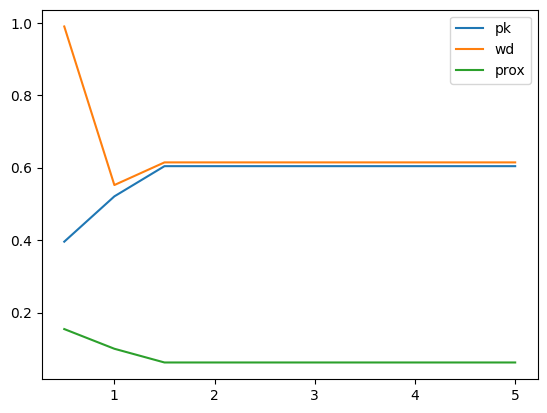

============= Predictions Summary =============
best pk: 0.3958333333333333, best prediction threshold: 0.5, proximity: 0.15467836257309941
P:[1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
R:[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Experiment 1 - 4Cd9B complete.



In [64]:
experimentation = Experiment(type="chain_count")

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="city",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=4,
        diverse_keywords=False,
        keyword_diversity=0.5,
        max_graph_depth=5,
        start=300,
        num_samples=100,
        batch_size=5,
        coherence_threshold=0.7,
        scoring_factor=2,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)
experimentation.run()

Running experiment set: 1LjAA
Running experiment: CoherenceExperiment(num_samples=150, start=300, dataset_type='fiction', model_string='sentence-transformers/LaBSE', max_words_per_step=4, coherence_threshold=0.7, experiment_hash='wfYtl', batch_size=10, max_graph_depth=5, keyword_diversity=0.0, diverse_keywords=False, similar_keywords=True, ablation=False, print_metrics_summary=True, print_predictions_summary=True, show_graphs=True)
Using dataset: fiction
TOTAL BATCHES: 15

.......... 1 .......... 2 .......... 3 .......... 4 .......... 5 .......... 6 .......... 7 .......... 8 .......... 9 .......... 10 .......... 11 .......... 12 .......... 13 .......... 14 .......... 15 
============= Metrics Summary =============
pk score: 0.6615384615384615
wd score: 0.7307692307692307
proximity: 0.0
confusion: f1 [0.94], tp [0], fp [3], tn [141], fn [6]
pk score: 0.6230769230769231
wd score: 0.6923076923076923
proximity: 0.0
confusion: f1 [0.9266666666666666], tp [0], fp [5], tn [139], fn [6]
pk sco

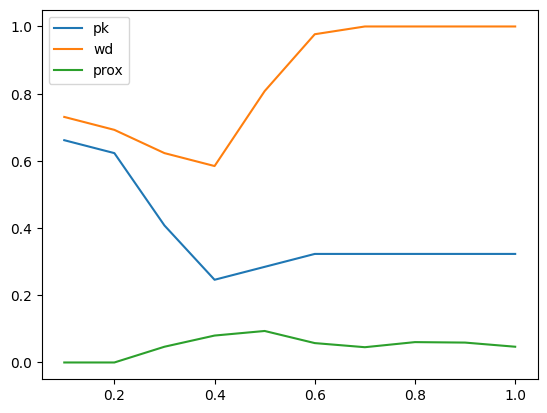

============= Predictions Summary =============
best pk: 0.24615384615384617, best prediction threshold: 0.4, proximity: 0.08012820512820513
P:[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
R:[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [63]:
experimentation = Experiment(type="weighted_count")

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="fiction",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=4,
        diverse_keywords=False,
        keyword_diversity=0.0,
        max_graph_depth=5,
        start=300,
        num_samples=150,
        batch_size=10,
        coherence_threshold=0.7,
        scoring_factor=0.25,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.run()

### Collecting final results for weighted count wikisection...

Running experiment set: pBTTr
Running experiment: CoherenceExperiment(num_samples=1000, start=300, dataset_type='disease', model_string='sentence-transformers/LaBSE', max_words_per_step=4, coherence_threshold=0.7, experiment_hash='5AeLX', batch_size=10, max_graph_depth=5, keyword_diversity=0.0, diverse_keywords=False, similar_keywords=True, ablation=False, print_metrics_summary=True, print_predictions_summary=True, show_graphs=True)
Using dataset: wikisection_disease
TOTAL BATCHES: 100

.......... 1 .......... 2 .......... 3 .......... 4 .......... 5 .......... 6 .......... 7 .......... 8 .......... 9 .......... 10 .......... 11 .......... 12 .......... 13 .......... 14 .......... 15 .......... 16 .......... 17 .......... 18 .......... 19 .......... 20 .......... 21 .......... 22 .......... 23 .......... 24 .......... 25 .......... 26 .......... 27 .......... 28 .......... 29 .......... 30 .......... 31 .......... 32 .......... 33 .......... 34 .......... 35 .......... 36 .......... 37

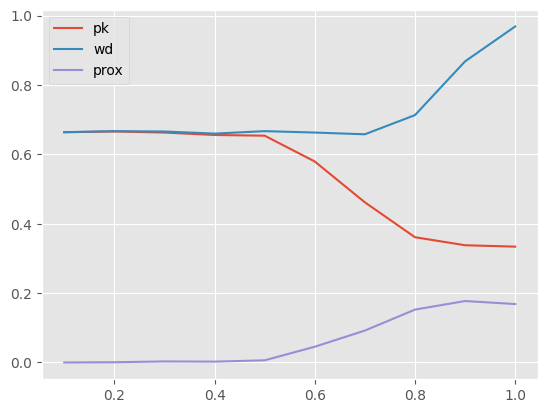

============= Predictions Summary =============
best pk: 0.3380281690140845, best prediction threshold: 0.9, proximity: 0.17716682316118937
P:[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,

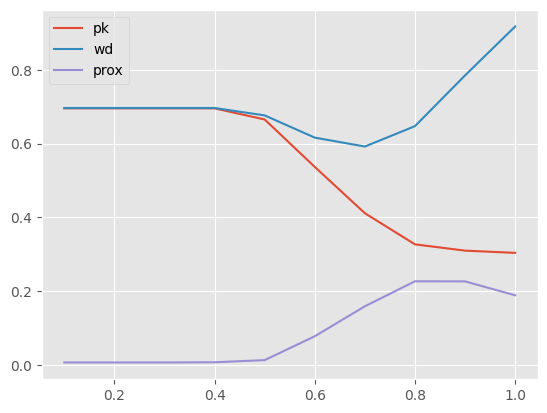

============= Predictions Summary =============
best pk: 0.30954773869346736, best prediction threshold: 0.9, proximity: 0.2261650047770915
P:[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,

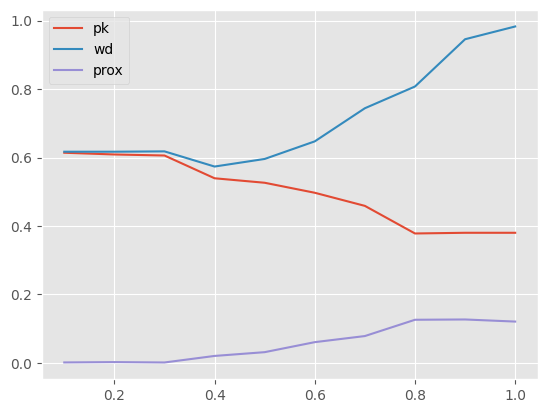

============= Predictions Summary =============
best pk: 0.3780241935483871, best prediction threshold: 0.8, proximity: 0.12588232974486374
P:[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,

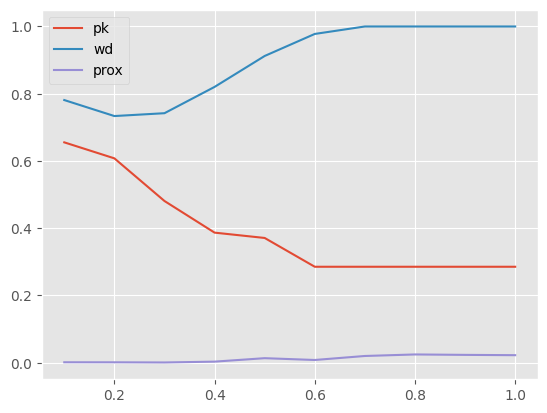

============= Predictions Summary =============
best pk: 0.2854122621564482, best prediction threshold: 0.8, proximity: 0.024605920799692427
P:[1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1

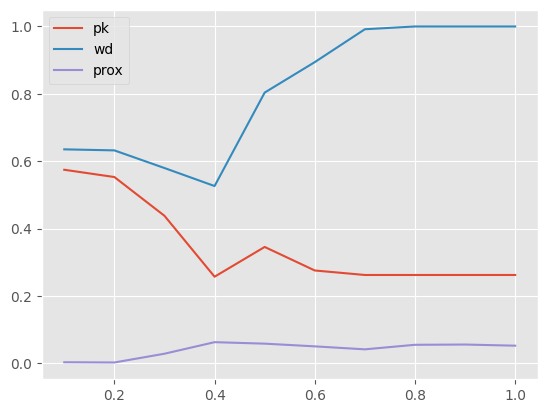

============= Predictions Summary =============
best pk: 0.2569373072970195, best prediction threshold: 0.4, proximity: 0.0625782227784731
P:[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

<Figure size 640x480 with 0 Axes>

In [73]:
experimentation = Experiment(type="weighted_count")

START = 300
NUM_SAMPLES = 1000
BATCH_SIZE = 10
DIVERSE_KEYWORDS = False
WORDS_PER_STEP = 4
KEYWORD_DIVERSITY = 0.0

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="disease",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="city",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="wiki50k",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5, # reducing graph depth because the wiki50k articles are very very long
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="clinical",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="fiction",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)
experimentation.run()

Running experiment set: 2WkR2
Running experiment: CoherenceExperiment(num_samples=1000, start=300, dataset_type='disease', model_string='sentence-transformers/LaBSE', max_words_per_step=4, coherence_threshold=0.7, experiment_hash='Ri1WS', batch_size=10, max_graph_depth=5, keyword_diversity=0.0, diverse_keywords=False, similar_keywords=True, ablation=False, print_metrics_summary=True, print_predictions_summary=True, show_graphs=True)
Using dataset: wikisection_disease
TOTAL BATCHES: 100

.......... 1 .......... 2 .......... 3 .......... 4 .......... 5 .......... 6 .......... 7 .......... 8 .......... 9 .......... 10 .......... 11 .......... 12 .......... 13 .......... 14 .......... 15 .......... 16 .......... 17 .......... 18 .......... 19 .......... 20 .......... 21 .......... 22 .......... 23 .......... 24 .......... 25 .......... 26 .......... 27 .......... 28 .......... 29 .......... 30 .......... 31 .......... 32 .......... 33 .......... 34 .......... 35 .......... 36 .......... 37

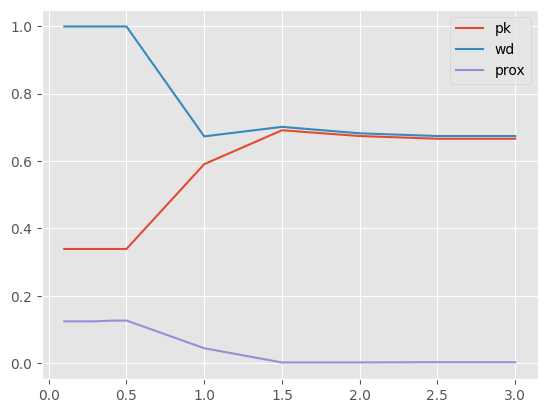

============= Predictions Summary =============
best pk: 0.33903420523138833, best prediction threshold: 0.5, proximity: 0.1268123711340206
P:[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

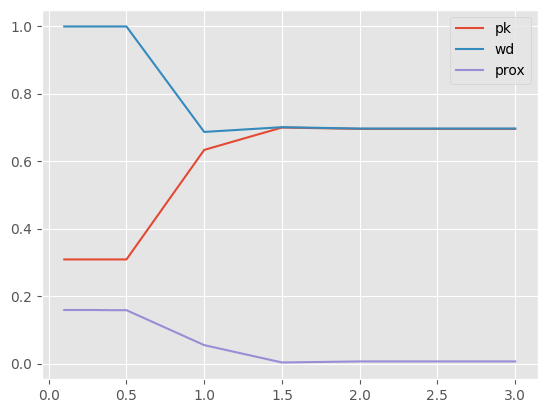

============= Predictions Summary =============
best pk: 0.3085427135678392, best prediction threshold: 0.3, proximity: 0.15861095426312818
P:[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

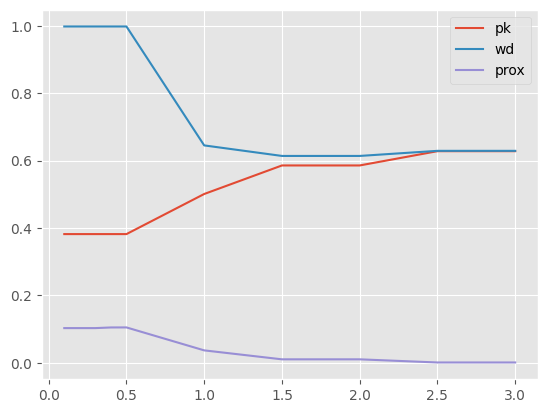

============= Predictions Summary =============
best pk: 0.38205645161290325, best prediction threshold: 0.5, proximity: 0.10516227519045
P:[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

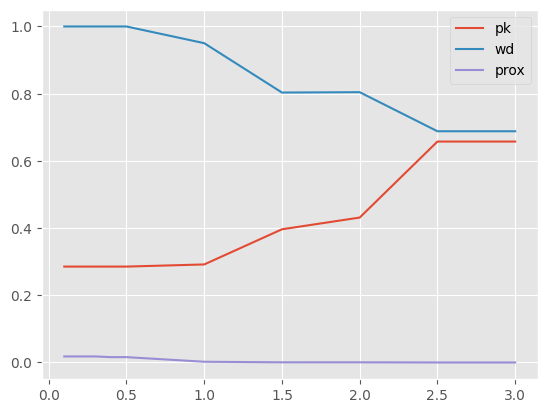

============= Predictions Summary =============
best pk: 0.2854122621564482, best prediction threshold: 0.3, proximity: 0.01795142555438226
P:[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

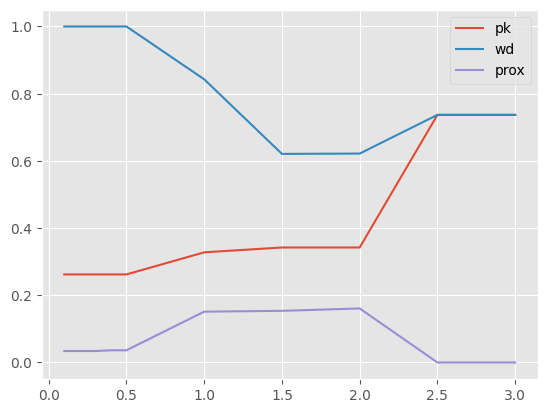

============= Predictions Summary =============
best pk: 0.3278520041109969, best prediction threshold: 1, proximity: 0.15126050420168066
P:[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

<Figure size 640x480 with 0 Axes>

In [76]:
experimentation = Experiment(type="chain_count")

START = 300
NUM_SAMPLES = 1000
BATCH_SIZE = 10
DIVERSE_KEYWORDS = False
WORDS_PER_STEP = 4
KEYWORD_DIVERSITY = 0.0

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="disease",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=2,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="city",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=2,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="wiki50k",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5, # reducing graph depth because the wiki50k articles are very very long
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=2,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="clinical",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=2,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="fiction",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=2,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)
experimentation.run()

# Choi

Running experiment set: FJcqs
Running experiment: CoherenceExperiment(num_samples=750, start=300, dataset_type='choi_3_5', model_string='sentence-transformers/LaBSE', max_words_per_step=4, coherence_threshold=0.7, experiment_hash='AXHFL', batch_size=25, max_graph_depth=5, keyword_diversity=0.0, diverse_keywords=False, similar_keywords=True, ablation=False, scoring_factor=2, print_metrics_summary=True, print_predictions_summary=True, show_graphs=True)
Using dataset: choi_3_5
TOTAL BATCHES: 30

......................... 1 ......................... 2 ......................... 3 ......................... 4 ......................... 5 ......................... 6 ......................... 7 ......................... 8 ......................... 9 ......................... 10 ......................... 11 ......................... 12 ......................... 13 ......................... 14 ......................... 15 ......................... 16 ......................... 17 ..................

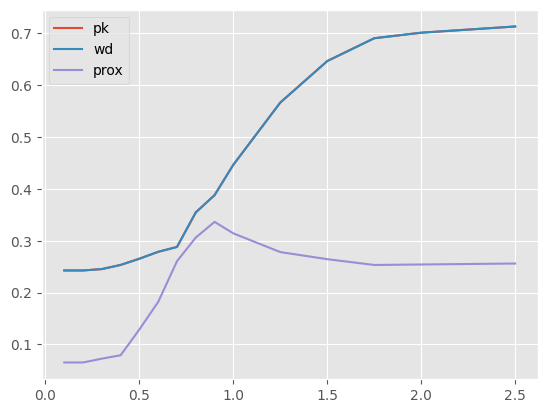

============= Predictions Summary =============
best pk: 0.288, best prediction threshold: 0.7, proximity: 0.2605397951142632
P:[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0

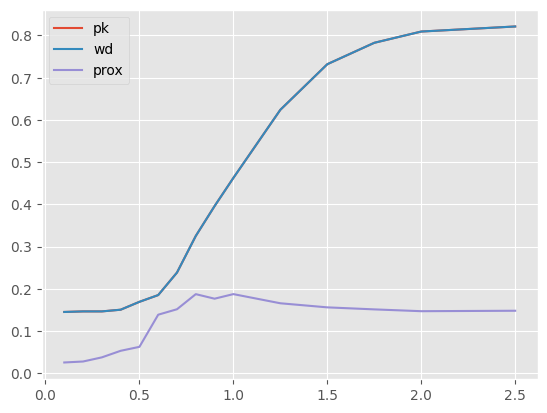

============= Predictions Summary =============
best pk: 0.18533333333333332, best prediction threshold: 0.6, proximity: 0.13884788572791792
P:[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1

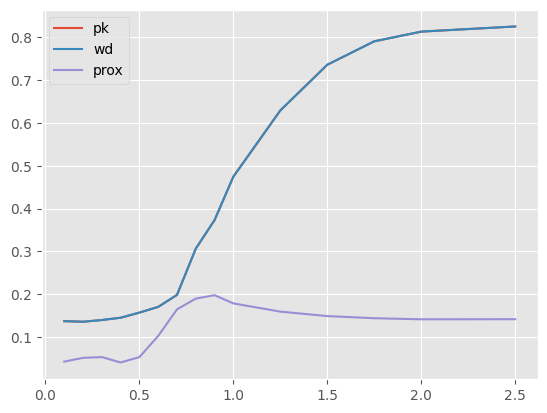

============= Predictions Summary =============
best pk: 0.19866666666666666, best prediction threshold: 0.7, proximity: 0.16487189472002556
P:[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0

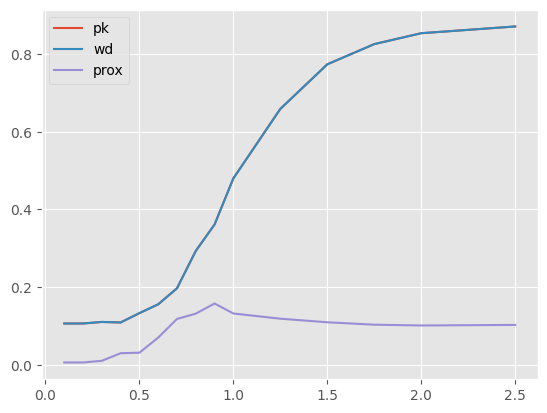

============= Predictions Summary =============
best pk: 0.19733333333333333, best prediction threshold: 0.7, proximity: 0.11832186168469355
P:[1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0

<Figure size 640x480 with 0 Axes>

In [18]:
experimentation = Experiment(type="weighted_count")

START = 300
NUM_SAMPLES = 750
BATCH_SIZE = 25
DIVERSE_KEYWORDS = False
WORDS_PER_STEP = 4
KEYWORD_DIVERSITY = 0.0

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="choi_3_5",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=2,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)


experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="choi_3_11",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=2,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)


experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="choi_6_8",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=2,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)


experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="choi_9_11",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=2,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.run()